In [3]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionImg2ImgPipeline
from torch import autocast
import requests
import torch
from PIL import Image
from io import BytesIO

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"


{'trained_betas'} was not found in config. Values will be initialized to default values.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


{'trained_betas'} was not found in config. Values will be initialized to default values.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


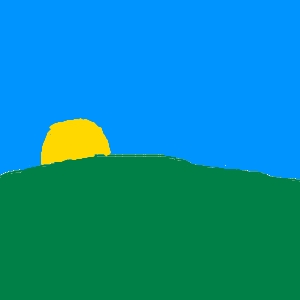

In [4]:
# load the pipeline
device = "cuda"
model_id_or_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)

pipe = pipe.to(device)

init_image = Image.open('sunrise.jpg')
init_image

In [8]:
init_image = init_image.resize((768, 512))
init_image

In [18]:
def generate(prompt, strength=0.95, guidance_scale=10):
    with autocast("cuda"):
        images = pipe(prompt=prompt, init_image=init_image, strength=strength, 
                      guidance_scale=guidance_scale).images

    images[0].save(f"{prompt.replace(' ', '_')}.png")
    return images[0]

pipe.safety_checker = lambda images, clip_input: (images, False)

In [6]:
prefix = "A sunrise "
styles = ["by Claude Monet", "by Vincent Van Gogh", 
          "amigurumi", "plasticine", "made of lights", "vaporwave", "8-bit style", "pixel art", "photorealistic"
          ""
         ]

prompts = [prefix + style for style in styles]
prompts


['A sunrise by Claude Monet',
 'A sunrise by Vincent Van Gogh',
 'A sunrise amigurumi',
 'A sunrise plasticine',
 'A sunrise made of lights',
 'A sunrise vaporwave',
 'A sunrise 8-bit style',
 'A sunrise pixel art',
 'A sunrise photorealistic']

  0%|          | 0/38 [00:00<?, ?it/s]

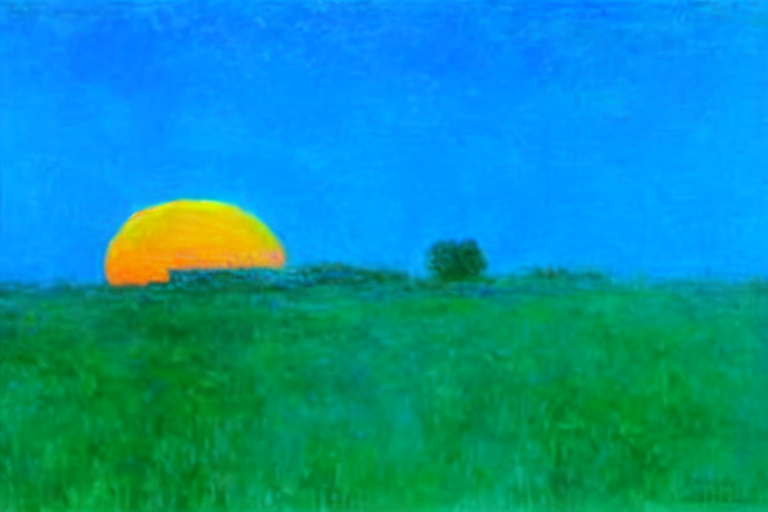

In [10]:
generate("A sunrise by Monet")

```
strength (`float`, *optional*, defaults to 0.8):
        Conceptually, indicates how much to transform the reference `init_image`. Must be between 0 and 1.
        `init_image` will be used as a starting point, adding more noise to it the larger the `strength`. The
        number of denoising steps depends on the amount of noise initially added. When `strength` is 1, added
        noise will be maximum and the denoising process will run for the full number of iterations specified in
        `num_inference_steps`. A value of 1, therefore, essentially ignores `init_image`.
        
        
    guidance_scale (`float`, *optional*, defaults to 7.5):
        Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
        `guidance_scale` is defined as `w` of equation 2. of [Imagen
        Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
        1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
        usually at the expense of lower image quality.
    eta (`float`, *optional*, defaults to 0.0):
```

  0%|          | 0/48 [00:00<?, ?it/s]

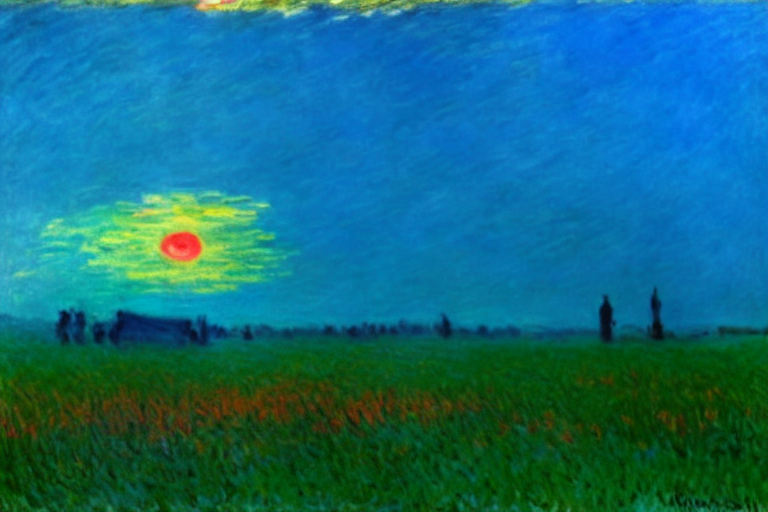

In [15]:
prompt = "A sunrise by Monet"
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, strength=0.95, guidance_scale=10).images

#images[0].save(f"{prompt.replace(' ', '_')}.png")
images[0]

  0%|          | 0/48 [00:00<?, ?it/s]

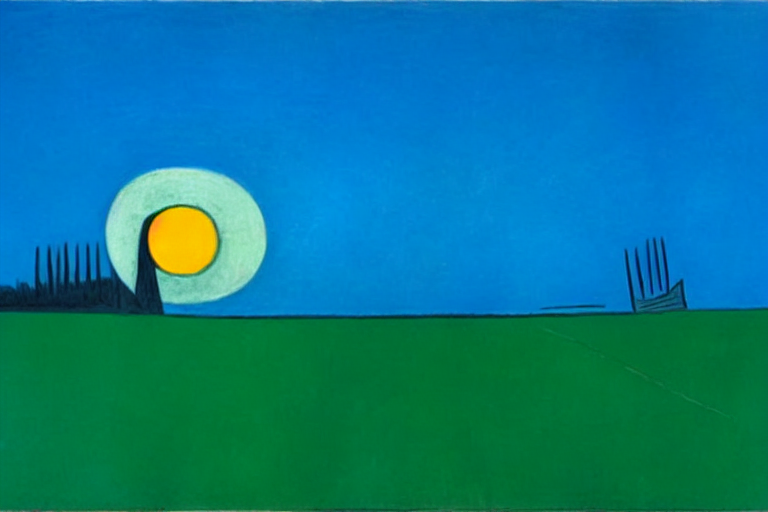

In [16]:
prompt = "A sunrise by Picasso"
with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, strength=0.95, guidance_scale=10).images

#images[0].save(f"{prompt.replace(' ', '_')}.png")
images[0]

In [17]:
prefix = "A sunrise "
styles = ["by Claude Monet", "by Vincent Van Gogh", 
          "amigurumi", "plasticine", "made of lights", "vaporwave", "8-bit style", "pixel art", "photorealistic"
          ""
         ]

prompts = [prefix + style for style in styles]
prompts


['A sunrise by Claude Monet',
 'A sunrise by Vincent Van Gogh',
 'A sunrise amigurumi',
 'A sunrise plasticine',
 'A sunrise made of lights',
 'A sunrise vaporwave',
 'A sunrise 8-bit style',
 'A sunrise pixel art',
 'A sunrise photorealistic']

A sunrise by Claude Monet


  0%|          | 0/48 [00:00<?, ?it/s]

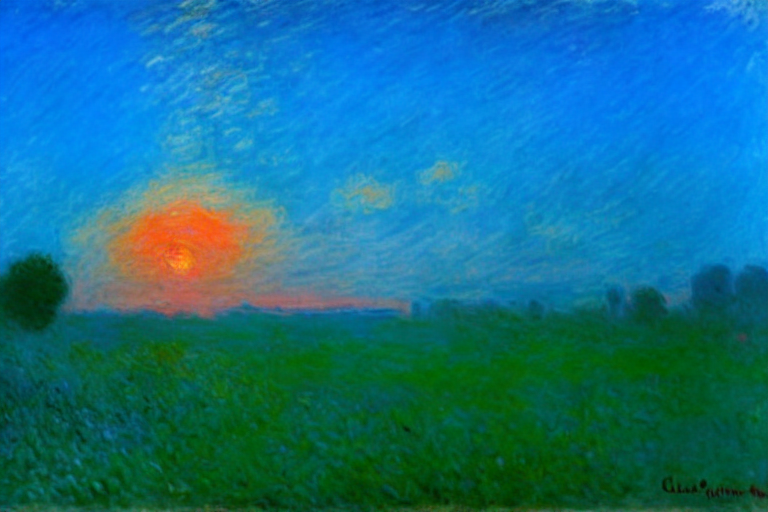

A sunrise by Vincent Van Gogh


  0%|          | 0/48 [00:00<?, ?it/s]

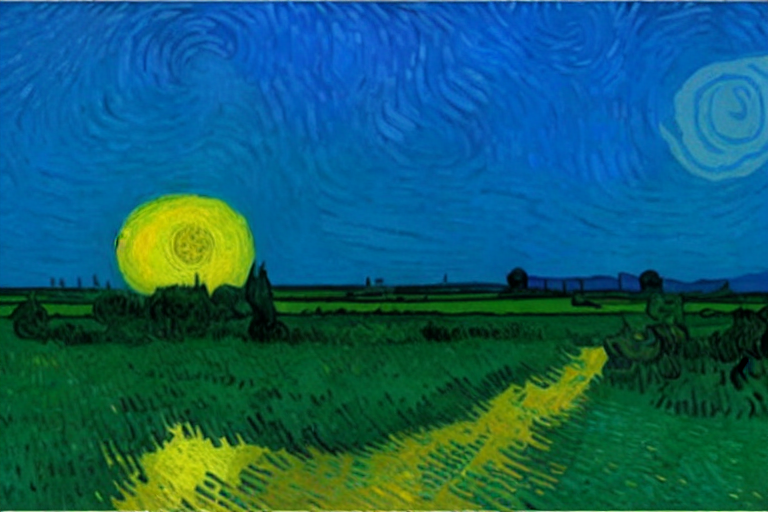

A sunrise amigurumi


  0%|          | 0/48 [00:00<?, ?it/s]

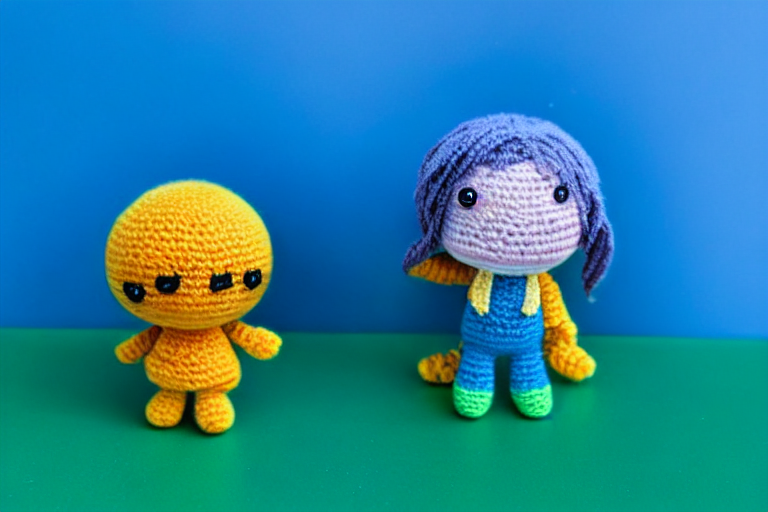

A sunrise plasticine


  0%|          | 0/48 [00:00<?, ?it/s]

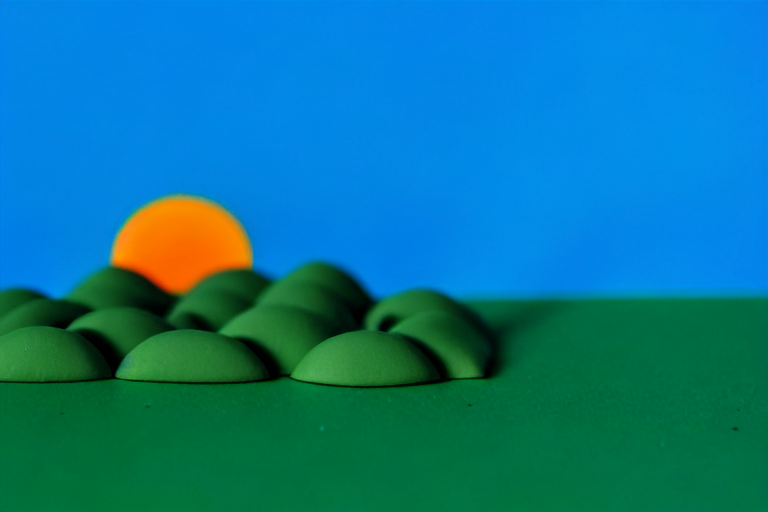

A sunrise made of lights


  0%|          | 0/48 [00:00<?, ?it/s]

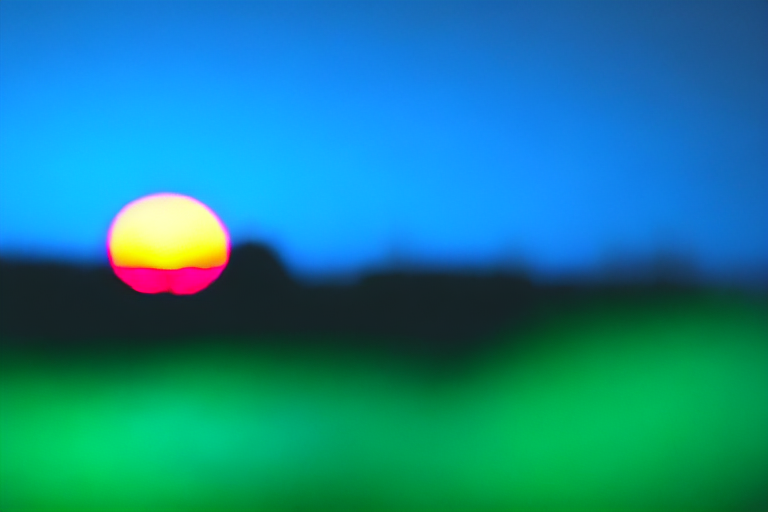

A sunrise vaporwave


  0%|          | 0/48 [00:00<?, ?it/s]

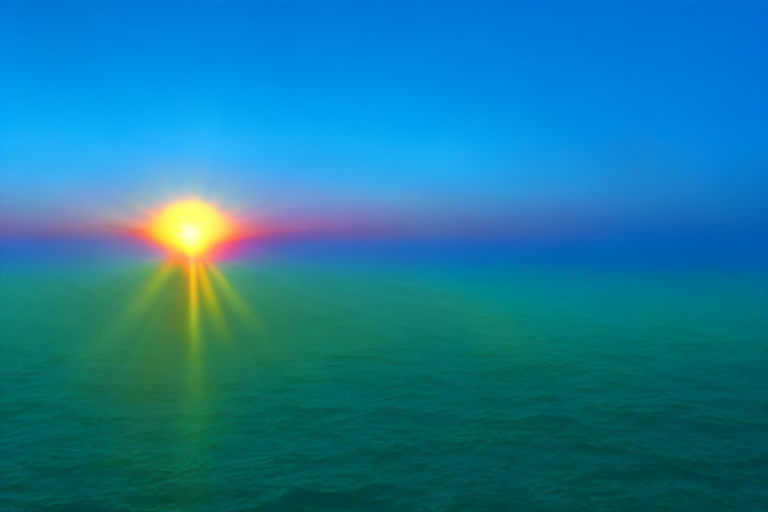

A sunrise 8-bit style


  0%|          | 0/48 [00:00<?, ?it/s]

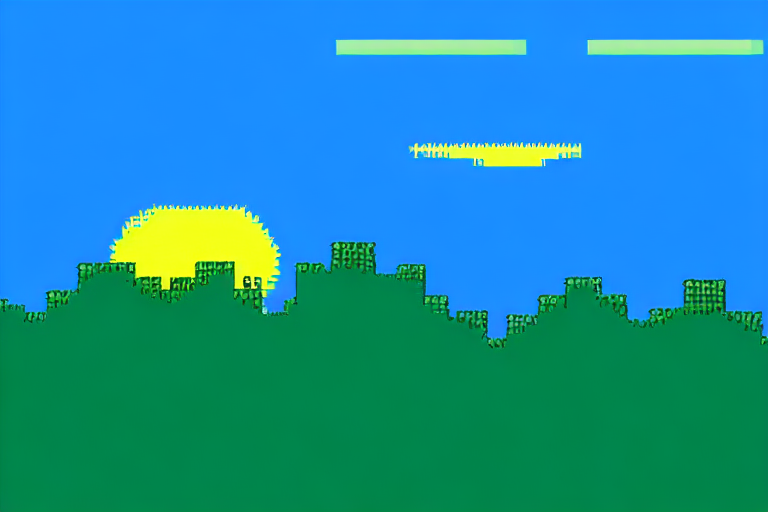

A sunrise pixel art


  0%|          | 0/48 [00:00<?, ?it/s]

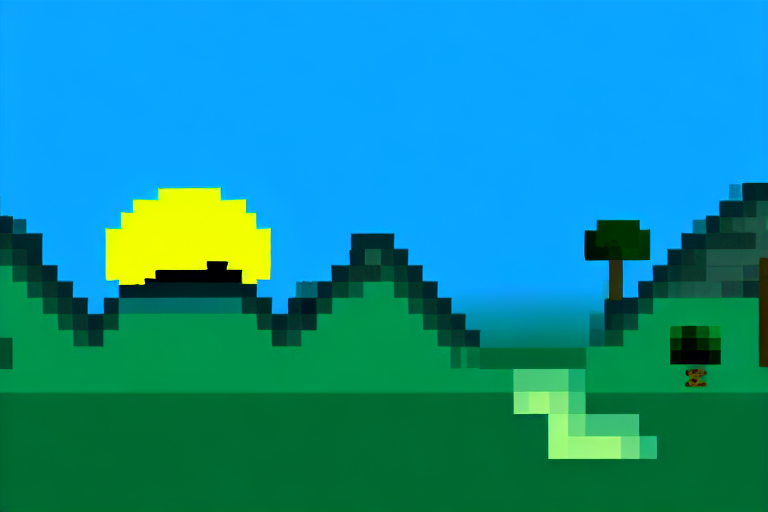

A sunrise photorealistic


  0%|          | 0/48 [00:00<?, ?it/s]

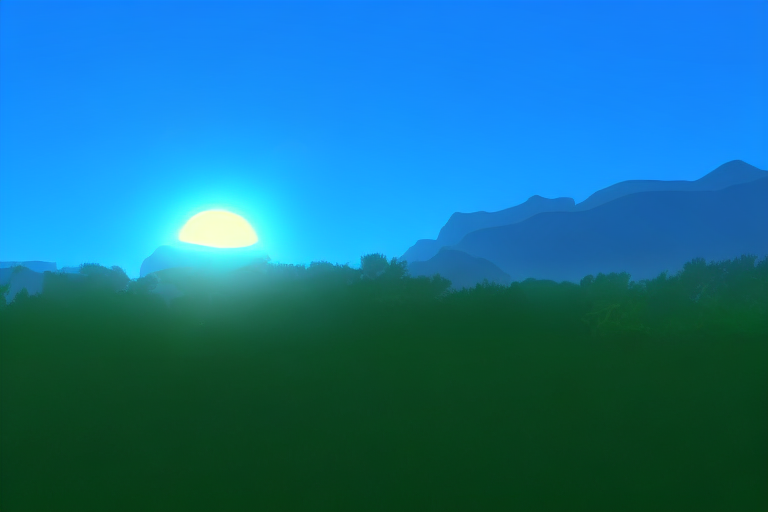

In [20]:
for prompt in prompts:
    print(prompt)
    img = generate(prompt)
    display(img)